In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/PRO/Desktop/P/LOAN/train.csv")
df.shape

(614, 13)

In [2]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


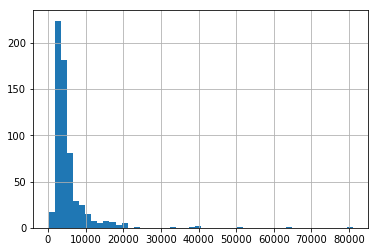

In [4]:
df["ApplicantIncome"].hist(bins = 50)
plt.show()

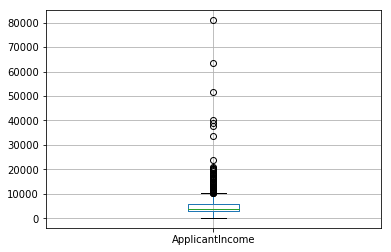

In [5]:
df.boxplot(column = "ApplicantIncome")
plt.show()

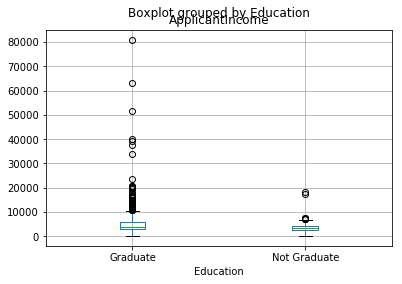

In [6]:
df.boxplot(column = "ApplicantIncome", by = "Education")
plt.show()

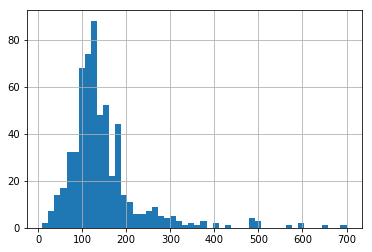

In [7]:
df['LoanAmount'].hist(bins=50)
plt.show()

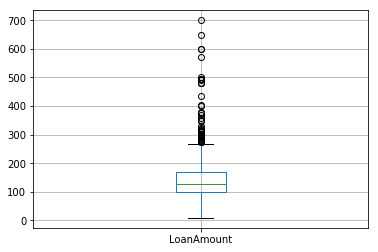

In [8]:
df.boxplot(column='LoanAmount')
plt.show()

In [9]:
temp1 = df["Credit_History"].value_counts()
print("Frequency Table for Credit History")
print(temp1)

Frequency Table for Credit History
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [10]:
temp2 = df.pivot_table(index = "Credit_History", values = "Loan_Status", aggfunc=(lambda x: x.map({"Y":1,"N":0}).mean()))
print("Probability of getting loan by Credit History")
print(temp2)

Probability of getting loan by Credit History
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


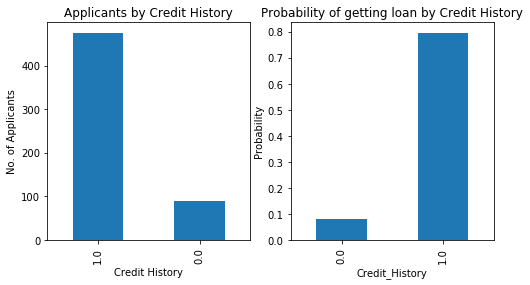

In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Credit History")
ax1.set_ylabel("No. of Applicants")
ax1.set_title("Applicants by Credit History")
temp1.plot(kind = "bar")
#plt.show()

ax2= fig.add_subplot(1,2,2)
ax2.set_xlabel("Credit History")
ax2.set_ylabel("Probability")
ax2.set_title("Probability of getting loan by Credit History")
temp2.plot(kind = "bar")
plt.show()

In [12]:
df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
print(df['Self_Employed'].value_counts())
df['Self_Employed'].fillna('No',inplace=True)
#df["Self_Employed"] = df["Self_Employed"].fillna("No")

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [14]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [15]:
print(df.loc[df['LoanAmount'].isnull(),['Self_Employed','Education', 'LoanAmount']])

    Self_Employed     Education  LoanAmount
0              No      Graduate         NaN
35             No      Graduate         NaN
63             No      Graduate         NaN
81            Yes      Graduate         NaN
95             No      Graduate         NaN
102            No      Graduate         NaN
103            No      Graduate         NaN
113           Yes      Graduate         NaN
127            No      Graduate         NaN
202            No  Not Graduate         NaN
284            No      Graduate         NaN
305            No  Not Graduate         NaN
322            No  Not Graduate         NaN
338            No  Not Graduate         NaN
387            No  Not Graduate         NaN
435            No      Graduate         NaN
437            No      Graduate         NaN
479            No      Graduate         NaN
524            No      Graduate         NaN
550           Yes      Graduate         NaN
551            No  Not Graduate         NaN
605            No  Not Graduate 

In [16]:
df['LoanAmount'] = df.groupby(['Education','Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

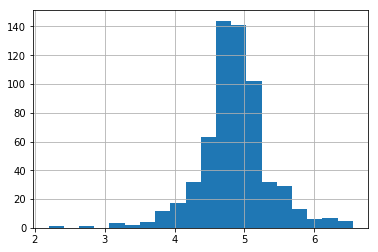

In [17]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
plt.show()

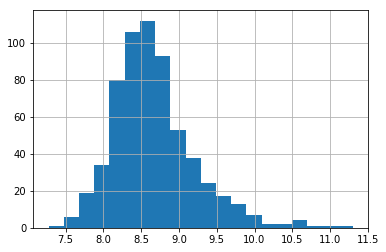

In [18]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [20]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\PRO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
df['Loan_Status'].fillna('No',inplace=True)
df['Credit_History'].fillna(1,inplace=True) 
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [22]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [23]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [24]:
#We can try different combination of variables:
df['Loan_Amount_Term'].fillna(360, inplace=True)
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.208%


In [25]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.339%


In [26]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.269541
TotalIncome_log     0.262226
LoanAmount_log      0.224102
Dependents          0.053064
Property_Area       0.048632
Loan_Amount_Term    0.042279
Gender              0.027760
Married             0.025262
Education           0.024401
Self_Employed       0.022732
dtype: float64


In [27]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 80.785%


In [28]:
model = GradientBoostingClassifier(n_estimators=50,learning_rate=0.13,max_depth=2)
model2 = ExtraTreesClassifier(n_estimators=50,max_depth=4)

predictor_var = ['Education','ApplicantIncome', 'CoapplicantIncome','LoanAmount_log', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log']
print('GradientBoosting')
classification_model(model, df,predictor_var,outcome_var)
print('ExtraTrees')
classification_model(model2, df,predictor_var,outcome_var)

GradientBoosting
Accuracy : 83.550%
Cross-Validation Score : 79.648%
ExtraTrees
Accuracy : 81.270%
Cross-Validation Score : 80.784%
